### Import libraries

In [31]:
import pprint
import json

import pandas as pd

from sklearn.metrics import r2_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Installing and importing tensorflow_docs 
`pip install git+https://github.com/tensorflow/docs`

In [2]:
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

### Loading dataset
#### Medical Cost Personal Datasets
Source: https://www.kaggle.com/mirichoi0218/insurance

Datafields:

* age: age of primary beneficiary 

* sex: insurance contractor gender (female, male)

* bmi: Body mass index, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking (yes, no)

* region: the beneficiary's residential area in the US (northeast, southeast, southwest, northwest)

* charges: Individual medical costs billed by health insurance

In [8]:
processed_data = pd.read_csv('datasets/insurance_processed.csv')

processed_data.head()

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,-1.438764,-0.453320,-0.908614,0,1,0,0,0,1,16884.92400
1,-1.509965,0.509621,-0.078767,1,0,0,0,1,0,1725.55230
2,-0.797954,0.383307,1.580926,1,0,0,0,1,0,4449.46200
3,-0.441948,-1.305531,-0.908614,1,0,0,1,0,0,21984.47061
4,-0.513149,-0.292556,-0.908614,1,0,0,1,0,0,3866.85520


In [9]:
processed_features = processed_data.drop('charges', axis=1)

target = processed_data[['charges']]

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [11]:
x_train.shape

(1070, 9)

In [12]:
x_test.shape

(268, 9)

In [23]:
with open('./my_models/relu_64_config.json', 'r') as infile: 
    
    model_json = json.load(infile)

In [24]:
pprint.pprint(model_json)

{'backend': 'tensorflow',
 'class_name': 'Sequential',
 'config': {'layers': [{'class_name': 'Dense',
                        'config': {'activation': 'elu',
                                   'activity_regularizer': None,
                                   'batch_input_shape': [None, 9],
                                   'bias_constraint': None,
                                   'bias_initializer': {'class_name': 'Zeros',
                                                        'config': {}},
                                   'bias_regularizer': None,
                                   'dtype': 'float32',
                                   'kernel_constraint': None,
                                   'kernel_initializer': {'class_name': 'GlorotUniform',
                                                          'config': {'seed': None}},
                                   'kernel_regularizer': None,
                                   'name': 'dense_6',
                               

In [26]:
model = tf.keras.models.model_from_json(json.dumps(model_json))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


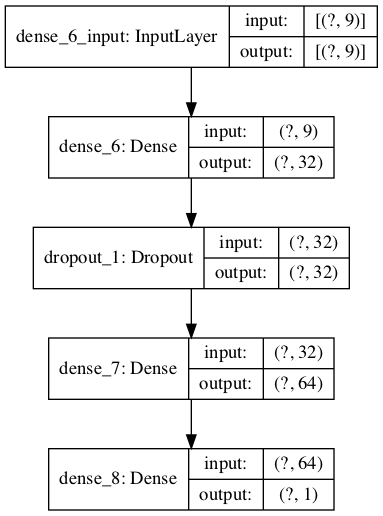

In [28]:
keras.utils.plot_model(model, 'model_relu_64_reloaded.png', show_shapes=True)

In [32]:
y_pred_after_loading = model.predict(x_test)

r2_score(y_test, y_pred_after_loading)

-1.20847709067362

In [33]:
model.load_weights("./my_models/relu_64_weights")

In [34]:
y_pred_after_loading = model.predict(x_test)

r2_score(y_test, y_pred_after_loading)

0.8373940027440104

### Loading model and perform prediction

In [35]:
loaded_model = tf.keras.models.load_model("./my_models/relu_64_config_weights")

loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [36]:
y_pred_after_loading = loaded_model.predict(x_test)

r2_score(y_test, y_pred_after_loading)

0.8373940027440104